## KNN算法

**原理**：计算和k个相邻元素的<u>距离</u>，推算出当前元素的性质  
**应用场景**：推荐系统（一个人喜欢的可能是一类物品）、金融风控与信用评估（某种人容易违约，和这种类似的人也可能违约）、医疗诊断、图像识别

**K如何选择呢？**  
K太小，可能过拟合。K太大，可能有太多的噪音。所以K的选择需要一个一个试验，选择一个最优解，注意K一般选择为<u>奇数</u>避免平票情况

**距离如何计算呢？**  
1 欧式距离：  
$$D(X,Y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$  
2 曼哈顿距离：  
$$D(X,Y) = \sum_{i=1}^{n}\left|x_i-y_i\right|$$  
3 明氏距离  
$$
D(X, Y) = \left( \sum_{i=1}^{n} |q_i - p_i|^p \right)^{\frac{1}{p}}
$$   

还需要注意，距离一定要“归一化”，这样可以保证各个坐标轴的比例相同，从而保障距离计算准确

现在分别用手写代码和scikit-learn包分别实现KNN，深入理解KNN算法的核心思想

## 手写KNN算法

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#样本特征值
data_X = [
    [1.3,6],
    [3.5,5],
    [4.2,2],
    [5,3.3],
    [2,9],
    [5,7.5],
    [7.2,4],
    [8.1,8],
    [9.3,5]
]

In [21]:
data_y = [0,0,0,0,1,1,1,1,1]

In [22]:
X_train = np.array(data_X)
y_train = np.array(data_y)

### 1.查看训练数据的分布

In [32]:
X_train[y_train == 1]

array([[2. , 9. ],
       [5. , 7.5],
       [7.2, 4. ],
       [8.1, 8. ],
       [9.3, 5. ]])

In [31]:
X_train[y_train == 0,0]

array([1.3, 3.5, 4.2, 5. ])

In [35]:
data_new = np.array([4,5])

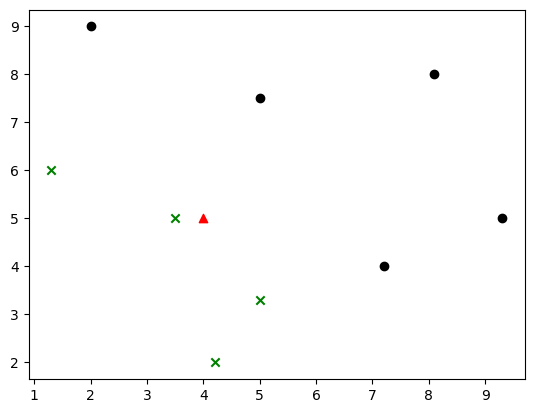

In [38]:
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], color='green',marker='x')
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], color='black',marker='o')
plt.scatter(data_new[0],data_new[1],color = 'red',marker = '^')
plt.show()

### 2.计算目标点和样本点之间的距离

In [ ]:
data_new = np.array([4,5])

In [40]:
(X_train[0] - data_new)**2

array([7.29, 1.  ])

In [41]:
distance = [np.sqrt(np.sum((data-data_new))**2) for data in X_train]

In [42]:
distance

[np.float64(1.7000000000000002),
 np.float64(0.5),
 np.float64(2.8),
 np.float64(0.7000000000000002),
 np.float64(2.0),
 np.float64(3.5),
 np.float64(2.2),
 np.float64(7.1),
 np.float64(5.300000000000001)]

In [45]:
sort_index = np.argsort(distance) # 从小到大排列
sort_index

array([1, 3, 0, 4, 6, 2, 5, 8, 7])

### 3.选取前K个值

In [56]:
k= 5
# y_train[sort_index[:k]]

y_index = [data_y[y] for y in sort_index[:k]]
y_index

[0, 0, 0, 1, 1]

In [57]:
from collections import Counter 

In [58]:
Counter(y_index).most_common()[0][0]

0

## scikit-learn方法实现KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [68]:
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
knn_classifier.predict(data_new.reshape(1,-1))[0]

np.int64(0)